$\textbf{Part I}$ 

Family buys cases of pop. Demand is 1 case per day. Let $y$ be the order quantity in cases. Let $t_0$ be the order cycle length in days. Let $K$ be the setup cost which is a step function of $y$ as defined in the code. Let $h$ be the holding cost that is also a step function of $y$ as defined in the code below. 

In [2]:
D = 1                      # This is the demand in cases per day.

def K(y):                  # This is the setup cost. $3 if 40 or less, $23 if more than 40. 
    if y <= 40:
        return 3
    elif y>=41:
        return 23

def p(y):                  # This is the price per case. 
    if y>=1 and y <=99:
        return 4.00
    elif y>=100 and y<=399:
        return 3.92
    elif y>=400:
        return 3.85
    
def h(y):                 # This is the holding cost of the inventory in price per item per t
    return .18*p(y)/365          

def tcu(y):
    return K(y)*D/y + h(y)*(1/2)*y

def print_tcu(y):
    print("TCU(",y,")=",tcu(y))

Next we use basic calculus to find the minimum(s) of our TCU function. 
\begin{align*}
\frac{d}{dy} TCU(y) &= \frac{d}{dy}\left( \frac{KD}{y} + \frac{.18\cdot p \cdot y}{2\cdot 365}\right) \\
&= -\frac{KD}{y^2} +  \frac{.18 p }{2\cdot 365} 
\end{align*}

Setting this derivative equal to zero we get 
\begin{align*}
y^{*} &= \sqrt{\frac{2KD}h}
\end{align*}

Next, since $K(y)$ and $p(y)$ are peicewise functions of $y$, we will evaluate $y^*$ at each of the different intervals and compute $TCU(y)$ and the appropriate values of $y$. 



For $y\leq40$,
\begin{align*}
y^{*} &= \sqrt{\frac{2KD}h} \\
&= \sqrt{\frac{2\cdot3\cdot 365}{.18\cdot4}} \\
&= \sqrt{\frac{6\cdot 365}{.18\cdot4}}  \\
&= 55.1513 \leftarrow \text{not feasible}
\end{align*}

For $41 \leq y\leq99$,
\begin{align*}
y^{*} &= \sqrt{\frac{2KD}h} \\
&=\sqrt{\frac{2\cdot23 \cdot 365}{.18\cdot 4} }\\
&= 152.707 \leftarrow \text{not feasible}
\end{align*}

For $100 \leq y\leq399$,
\begin{align*}
y^{*} &= \sqrt{\frac{2KD}h} \\
&=\sqrt{\frac{2\cdot23 \cdot 365}{.18\cdot 3.92} }\\
&= 154.257
\end{align*}

For $400 \leq y$,
\begin{align*}
y^{*} &= \sqrt{\frac{2KD}h} \\
&=\sqrt{\frac{2\cdot23 \cdot 365}{.18\cdot 3.85} }\\
&= 155.653  \leftarrow \text{not feasible}
\end{align*}

We see that we only had one feasible solution giving by solving for $y^*$. Since we need to have a positive integer number of cases, we evaluate $TCU(y)$ around the optimimum and at all of the endpoints.

In [3]:
crit_points = [1,40,41,99,100,154,155,399,400]
for point in crit_points:
    print_tcu(point)


TCU( 1 )= 3.000986301369863
TCU( 40 )= 0.11445205479452054
TCU( 41 )= 0.6014139659204811
TCU( 99 )= 0.3299670679396707
TCU( 100 )= 0.32665753424657534
TCU( 154 )= 0.29820325209037535
TCU( 155 )= 0.2982062748563853
TCU( 399 )= 0.44330767191952486
TCU( 400 )= 0.43722602739726024


$\textbf{1.}$ We see that the optimal is found at $y^*=40$. The total cost per unit at this order quantity is $\$0.1144$. Thus the resulting total cost per year (not including cost of soda) is $ \frac{1 case}{day}\cdot\frac{365day}{year}\cdot\frac{\$.1144}{case} = \frac{\$41.76}{year} $


$\textbf{2.}$ Since the order quantity $y^*$ was found to be 40, then it follows that the optimal order cycle length is $t_0^* = y^*/D = 40\cdot days/1 = 40 days. $ We also see that the number of order required per year is $ \lceil \frac{365}{40} \rceil = 10$

$\textbf{Part II}$

The airport in the problem has two runways, one for takeoffs, and one for landings. Planes arrive according to a Poisson distribution with $\lambda = 12$ planes arriving per hour. The time needed for a plane to land after getting permission follows an exponential distribution with mean $\frac1\lambda=2.5$ minutes. This process must be completed before giving clearance to another plane to land. The FAA has these rules:

* average number of planes waiting for clearance to land should not exceed 1.
* only 5% of the time should the actual number of airplanes waiting to receive clearance to land exceed four.  

$\textbf{1.}$ Evaluate whether or not these criteria are currently being met. 

$\textit{Preliminaries.}$ We first categorize our model according to the standard categorization scheme for queuing models. Since the arrival times are assumed to follow a Poisson distribution, then we denote this with an 'M' for Markovian. Since the service times are assumed to follow an exponential distribution, we denote this also with an 'M.' Due to the fact that we have only one runway for landings and we are not concerned with takeoffs, then our number of servers is 1. Since it is not specified that airports use a nonstandard queuing discipline, we assume they use FIFO (first in first out). Since we are not given a system capacity or source capacity, we assume both of these are unbounded. Thus the model for part one is 
$$\textbf{M/M/1/FIFO/ $\infty$/ $\infty$}$$


To set up our model, we first assume our queuing system can be represented as a Markov Chain (as shown below) with each $n^{th}$ node representing the system having $n$ people in it.  We also define the following variables and parameters. 

$\lambda = \frac{12 planes}{hour}$ -the mean arrival rate of planes;

$ \mu = \frac{1 plane}{2.5 min} = \frac{24 planes}{hour}$ the mean service rate;

$\lambda_{lost}$ - Arrival rate lost due to system capacity being finite

$\lambda_{eff} = \lambda-\lambda_{lost}$ - Effective arrival rate

$p_n$ - Probability of having $n$ planes in the queue;

$c$ - number of servers

$L$ - The mean number of planes in the queue (in line and being served);

$L_q=\frac{\lambda^2}{\mu(\mu-\lambda)}$ - The mean queue length;

$L_s = \frac{\lambda}{\mu-\lambda}$ - Expected number of customers in the system

$W_s = \frac1{\mu-\lambda}$ - Expected wait time in the system

$W_q = \frac{\lambda}{\mu(\mu-\lambda)}$ - Expected wait time in the queue

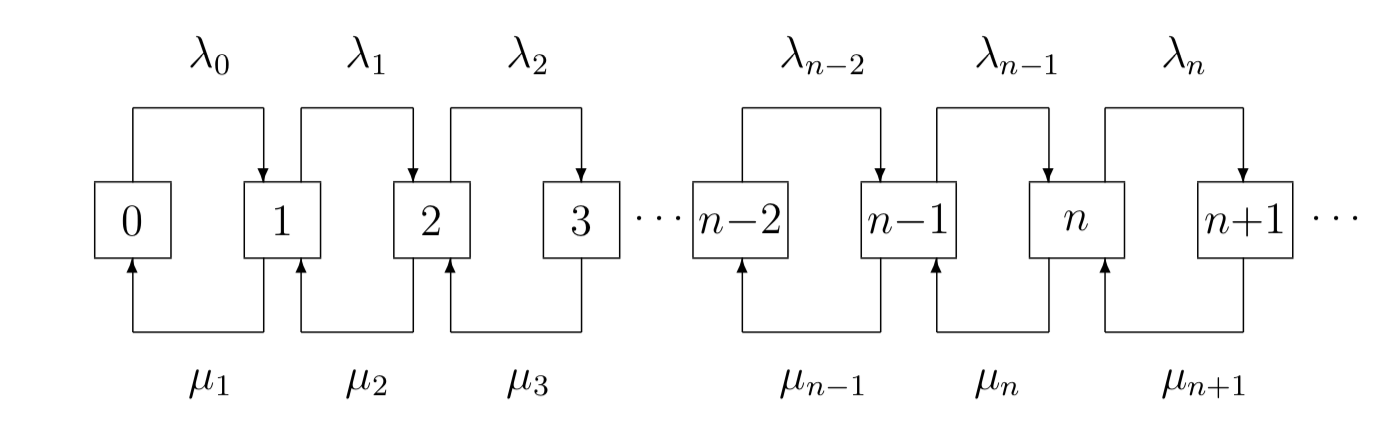


Next we derive the probabilities for each $p_n$. The assumption of the Markov chain is the probability of jumping to another state on the chain is equally likely no matter where we are on the chain. This implies that $p1= \frac{\lambda_0}{\mu_1}p_0, p_2= \frac{\lambda_1}{\mu_2}p_1, \ldots, p_n = \frac{\lambda_{n-1}}{\mu_n}p_{n-1}$ If we solve all of these in terms of $p_0$, we get 
$$
p_n = C_n p_0 \hspace{15mm} C_n = \frac{\lambda_0\lambda_1\ldots\lambda_{n-1}}{\mu_1 \mu_2\ldots \mu_n}\hspace{15mm} Cn=\frac{\lambda_{n-1}}{\mu_n}C_{n-1} \hspace{15mm} n\in \{1,2,\ldots\}
\hspace{15mm} \spadesuit$$
Then we use the fact that the sum of the probabilities must equal 1, 


\begin{align*}
&& 1 = \sum_{n=0}^\infty p_n &= p_0 + \sum_{n=1}^\infty C_np_0 &\\
&&&&\\
&\Rightarrow &p_0 &= \left(1 + \sum_{n=1}^\infty C_n \right)^{-1}&
\end{align*}
Using the fact that all the $\lambda$s are the same and the $\mu$s are too, we get 

\begin{align*}
p_0 &= \left( 1 + \sum_{n=1}^\infty \left(\frac{12}{24}\right)^n \right)^{-1}\\
&= \left( 1 + \frac{1/2}{1-\frac12} \right)^{-1} \\
&= \frac{1}{2}   \hspace{25mm} \diamondsuit
\end{align*}

The remaining probabilities will be computed by python below according to formula   $\spadesuit$.



Next we introduce Little's formulas:

$$
L_s = \lambda_{eff} W_s  \hspace{14mm} L_q = \lambda_{eff}W_q
$$
which state that the expected number of customers in the system equals the actual arrival rate times the expected wait time in the system, and the expected number of people in the queue equals the actual arrival rate times the expected wait time in the queue. 

$\textit{Solution.}$ To evaluate whether the average plane waiting for clearance to land exceeds one, we use Little's formula for the expected number of customers in the queue, $L_q$. Since the system capacity is infinite, then $\lambda_{eff} = \lambda = 12$ planes per hour. We are given from the text that $W_q = \frac\lambda{\mu(\mu-\lambda)} = \frac{12}{24(12)} = \frac{1}{24}\frac{hour}{plane}$. Thus we find
$$
L_q = \frac{12 planes}{hour} \cdot \frac{1}{24}\frac{hour}{plane} = .5
$$
this is less than or equal to 1 and so the first criterion is met. 

To evaluate the percent of the time that number of planes waiting to land exceeds four, we will calculate the probability of being in states 6 or greater with python. Note that state 5 means that exactly 4 planes are waiting to land, so states 6 and higher correspond to the number of planes waiting to land $\textit{exceeding }$ 4. Also since the probabilities sum to 1, then we calculate this sum to be $P(n\geq6)= 1-P(n<6)= 1-\sum_{n=0}^{5} p_n$

In [4]:
# First we make our template using a pandas dataframe. 

import pandas as pd
pd.options.mode.chained_assignment = None  # repress copy warning message
n=list(range(0,45)) # make this as long as needed 
lamb = 12   # lambda
mu = 24      
dat = pd.DataFrame() # initialize dataframe
dat['n'] = n
dat['lamb']= [lamb]*len(n)   # adding columns to dataframe
dat['mu'] = [mu]*len(n)
dat['cn'] = [0.0]*len(n)  # initialize cn column
dat['pn'] = [0.0]*len(n)  #initialize the pn colunn



dat['pn'][0] = .5           # This is from the DIAMOND symbol above     P_0 computation
dat['cn'][0]= 1

for i in range(1,len(n)):  # This is the cn calculation from  SPADE symbol 
    dat['cn'][i]=(dat['lamb'][i-1]*dat['cn'][i-1])/(dat['mu'][i])
    

for i in range(1,len(n)):
    dat['pn'][i]=dat['cn'][i]*dat['pn'][0]
    

print(dat.loc[0:5][['pn']].sum())            #We're doing    1-(p0+p1+p2+p3+p4+p5)
print('Probability that more than four planes are waiting is',
      1-dat.loc[0:5][['pn']].sum())                 
dat.loc[0:7]  # this line is just to see dataframe

pn    0.984375
dtype: float64
Probability that more than four planes are waiting is pn    0.015625
dtype: float64


,n,lamb,mu,cn,pn
0,0,12,24,1.000000,0.500000
1,1,12,24,0.500000,0.250000
2,2,12,24,0.250000,0.125000
3,3,12,24,0.125000,0.062500
4,4,12,24,0.062500,0.031250
5,5,12,24,0.031250,0.015625
6,6,12,24,0.015625,0.007812
7,7,12,24,0.007812,0.003906


Thus we see that the percent of the time that the number of planes waiting to land exceeds four is 1.56% which is less than 5%. 

$\textbf{2.}$ If another airlines buys airport and increases arrivival time to $\lambda = 15$ planes per hour, will criteria still be met? 

$\textit{Solution.}$ We will use Little's formula again for the expected number of customers in the queue with the updated arrival rate value. 

\begin{align*}
L_q &= \lambda \cdot W_q \\
&= \lambda\frac{\lambda}{\mu(\mu-\lambda)} \\
&= \frac{15\cdot 15}{24\cdot 9}\\
&= \frac{225}{216}\\
&>1
\end{align*}

Thus we see that the average number of airplanes waiting for clearance now exceeds 1. 

To check the percent of time that more than 4 planes are waiting to land, use the formulas described above but with the new arrival rate. 


\begin{align*}
p_0 &= \left( 1 + \sum_{n=1}^\infty \left(\frac{\lambda}{\mu}\right)^n \right)^{-1}\\
&=\left( 1 + \sum_{n=1}^\infty \left(\frac{15}{24}\right)^n \right)^{-1}\\
&= \left( 1 + \frac{5/8}{1-\frac58} \right)^{-1} \\
&=\left( 1 + \frac{5/8}{\frac38} \right)^{-1} \\
&=\left( 1 + \frac53 \right)^{-1} \\
&=\left( \frac83\right)^{-1} \\
&= \frac{3}{8}   \hspace{25mm} \diamondsuit\diamondsuit
\end{align*}

In [5]:
pd.options.mode.chained_assignment = None    # default='warn' 
dat['lamb'] = 15
dat['cn'] = [0.0]*len(n)
dat['pn'] = [0.0]*len(n)
dat['cn'][0] = 1
dat['pn'][0] = 3/8                           # This value of p0 is from double diamond symbol. 

for i in range(1,len(n)):                    # This is the cn calculation from  SPADE symbol. 
    dat['cn'][i]=(dat['lamb'][i-1]*dat['cn'][i-1])/(dat['mu'][i])
    

for i in range(1,len(n)):                   # This calculation of pn is from SPADE symbol. 
    dat['pn'][i]=dat['cn'][i]*dat['pn'][0]
    

print(dat.loc[0:5][['pn']].sum())            #We're doing    1-(p0+p1+p2+p3+p4+p5).
print('Probability that more than four planes are waiting is ',
      1-dat.loc[0:5][['pn']].sum())                 
dat.loc[0:7]  # this line is just to see dataframe

pn    0.940395
dtype: float64
Probability that more than four planes are waiting is  pn    0.059605
dtype: float64


,n,lamb,mu,cn,pn
0,0,15,24,1.000000,0.375000
1,1,15,24,0.625000,0.234375
2,2,15,24,0.390625,0.146484
3,3,15,24,0.244141,0.091553
4,4,15,24,0.152588,0.057220
5,5,15,24,0.095367,0.035763
6,6,15,24,0.059605,0.022352
7,7,15,24,0.037253,0.013970


Now we see that the probability of having more than four planes waiting is 5.9605% which is greater than 5% which would violate the criteria. 



$\textbf{3.}$ The airport considers adding second runway for landings. Find maximum arrival rate that the airport could support while still meeting FAA criteria mentioned above. 


$\textit{Solution.}$ Since we are given that one runway was added and no other changes were made, then we can assume that we now have a model of the form
$$
\textbf{M/M/2/FIFO/$\infty$/$\infty$}
$$
Now our Markov chain diagram looks like:

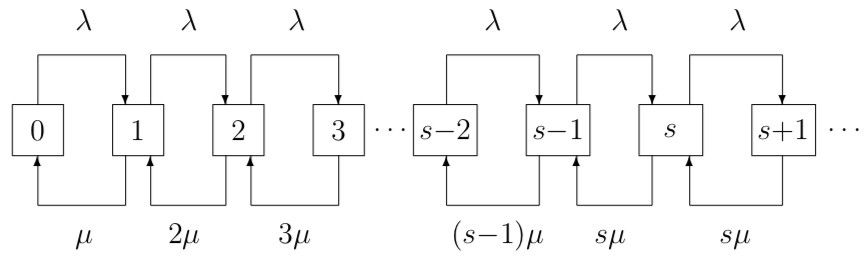

The first modification we make to our model is for the $C_n$. We now have, 
\begin{align*}
C_n &= \frac{\lambda^n}{n!\mu^n}= && \text{ for } n \in \{0,1\}&&\clubsuit\\
& &&  &&\\
C_n &= \frac{\lambda^n}{2!2^{n-2}\mu^{n}}=\frac{2^2}{2!}\left(\frac{\lambda}{2\mu}\right)^{n}&&\text{ for }n\in \{2,3,\ldots\}&&\clubsuit\\
\end{align*}

 We also have to modify our $p_0$ calculation as follows:
 \begin{align*}
 p_0 &= \left( 1 + \sum_{n=1}^\infty C_n \right)^{-1} \\
 &= \left( 1 + \sum_{n=1}^1 C_n+\sum_{n=2}^{\infty} C_n \right)^{-1} \\
 &= \left( 1 + \sum_{n=1}^1 C_n+\sum_{n=2}^{\infty} C_n \right)^{-1} \\
 &=\left( 1 + \sum_{n=1}^1\frac{\lambda^n}{n!\mu^n}+\sum_{n=2}^{\infty} \frac{\lambda^n}{2!2^{n-2}\mu^{n}} \right)^{-1} \\
 &= \left( 1 + \frac{\lambda}{\mu}+\frac{2^2}{2!}\sum_{n=2}^{\infty}\left(\frac{\lambda}{2\mu}\right)^{n} \right)^{-1} \\
  &= \left( 1 + \frac{\lambda}{\mu}+2\sum_{n=2}^{\infty}\left(\frac{\lambda}{2\mu}\right)^{n} \right)^{-1} \\
&= \left( 1 + \frac{\lambda}{\mu}+2 \frac{\left(\frac{\lambda}{2\mu}\right)^2 }{1-\left(\frac{\lambda}{2\mu}\right)}\right)^{-1} \hspace{15mm} \heartsuit \\
 \end{align*}

We purposely left $p_0$ in terms of $\lambda$ and $\mu$ so we can change them as needed. Now coding the new variables in python: 

We will find the maximum value of lambda by brute force and then run the code for a value one higher to show that it is the max. 

In [6]:
import math

pd.options.mode.chained_assignment = None    # default='warn' 
lamb = 28  # lambda
mu = 24     # mu
dat['lamb'] = lamb
dat['cn'] = [0.0]*len(n)
dat['pn'] = [0.0]*len(n)
dat['cn'][0] = 1
dat['pn'][0] = 3/8                           
rho = (lamb/(2*mu))
denom = 1+ lamb/mu + (2*(lamb/(2*mu))**2)/(1-(lamb/(2*mu)))
denom2 = 1 + lamb/mu + (2*rho**2)/(1-rho)
print(denom,denom2,1/denom) # double checking denominator for p0  from  HEART symbol 

dat['pn'][0] = 1/denom

for i in range(0,len(n)): #   Coding C_n      CLUB symbol 
    if i<2:
        dat['cn'][i] = (lamb**i)/(math.factorial(i)*mu**i)
    else:
        dat['cn'][i] = 2*(lamb/(2*mu))**i
        

for i in range(1,len(n)):
    dat['pn'][i] = dat['cn'][i]*dat['pn'][0]
    

print(dat.loc[0:5][['pn']].sum())            #We're doing    1-(p0+p1+p2+p3+p4+p5).
print('Probability that more than four planes are waiting is ',
      1-dat.loc[0:5][['pn']].sum())                 

print('sum of pn is ', dat['pn'].sum())

dat.loc[0:7]  # this line is just to see dataframe

3.8000000000000007 3.8000000000000007 0.26315789473684204
pn    0.950231
dtype: float64
Probability that more than four planes are waiting is  pn    0.049769
dtype: float64
sum of pn is  0.9999999999630415


,n,lamb,mu,cn,pn
0,0,28,24,1.000000,0.263158
1,1,28,24,1.166667,0.307018
2,2,28,24,0.680556,0.179094
3,3,28,24,0.396991,0.104471
4,4,28,24,0.231578,0.060942
5,5,28,24,0.135087,0.035549
6,6,28,24,0.078801,0.020737
7,7,28,24,0.045967,0.012097


In [7]:
import math

pd.options.mode.chained_assignment = None    # default='warn' 
lamb = 29  # lambda
mu = 24     # mu
dat['lamb'] = lamb
dat['cn'] = [0.0]*len(n)
dat['pn'] = [0.0]*len(n)
dat['cn'][0] = 1
dat['pn'][0] = 3/8                           
rho = (lamb/(2*mu))
denom = 1+ lamb/mu + (2*(lamb/(2*mu))**2)/(1-(lamb/(2*mu)))
denom2 = 1 + lamb/mu + (2*rho**2)/(1-rho)
print(denom,denom2,1/denom) # double checking denominator for p0  from  HEART symbol 

dat['pn'][0] = 1/denom

for i in range(0,len(n)): #   Coding C_n      CLUB symbol 
    if i<2:
        dat['cn'][i] = (lamb**i)/(math.factorial(i)*mu**i)
    else:
        dat['cn'][i] = 2*(lamb/(2*mu))**i
        

for i in range(1,len(n)):
    dat['pn'][i] = dat['cn'][i]*dat['pn'][0]
    

print(dat.loc[0:5][['pn']].sum())            #We're doing    1-(p0+p1+p2+p3+p4+p5).
print('Probability that more than four planes are waiting is ',
      1-dat.loc[0:5][['pn']].sum())                 

print('sum of pn is ', dat['pn'].sum())

dat.loc[0:7]  # this line is just to see dataframe

4.052631578947368 4.052631578947368 0.24675324675324678
pn    0.939365
dtype: float64
Probability that more than four planes are waiting is  pn    0.060635
dtype: float64
sum of pn is  0.9999999998230565


,n,lamb,mu,cn,pn
0,0,29,24,1.000000,0.246753
1,1,29,24,1.208333,0.298160
2,2,29,24,0.730035,0.180138
3,3,29,24,0.441063,0.108834
4,4,29,24,0.266475,0.065754
5,5,29,24,0.160996,0.039726
6,6,29,24,0.097268,0.024001
7,7,29,24,0.058766,0.014501


Thus we have shown that the maximum value of $\lambda$ is 28

$\textbf{III}$



Consider the Traveling Salesman Network as shown on the test. 

$\textbf{1.}$ Enumerate all possible tours excluding equivalent ones. Calculate the distance of each to find the optimal solution. 

$\textit{Solution. }$ To enumerate all possible tours, we observe that we can fix a first element since we are dealing with cycles. We also need to disregard all tours that are a reverse order of a previouly listed tour. Thus we will have $\frac{(6-1)!}{2}=60$ tours. We will store these tours in a pandas dataframe and use python to caluclate the distances. 

In [8]:
import numpy as np
import pandas as pd
import os
os.chdir('/Users/warrenkeil/desktop')
print(os.getcwd())


A = np.array([[0,22,14,28,11,13],[22,0,45,31,42,28],
              [14,45,0,37,25,39],[28,31,37,0,6,19],
             [11,42,25,6,0,9],[13,28,39,19,9,0]])

tour = pd.read_csv('tsp.csv')
n= 60

print('tour shape is ', tour.shape)
tour.loc[0:59]


/Users/warrenkeil/Desktop
tour shape is  (60, 6)


,a,b,c,d,e,f
0,0,1,2,3,4,5
1,0,1,2,3,5,4
2,0,1,2,4,3,5
3,0,1,2,4,5,3
4,0,1,2,5,3,4
5,0,1,2,5,4,3
6,0,1,3,2,4,5
7,0,1,3,2,5,4
8,0,1,3,4,2,5
9,0,1,3,4,5,2


In [9]:
# now define the cost function for each tour. 
import numpy as np

def cost(t0):
    s = 0
    for i in range(0,len(t0)):
        s = s + A[t0[i],t0[(i+1)%len(t0)]]  # A is the distance matrix 
        
    return s                              # the cost function has been tested heavily

 # initialize mincost with random tour. 
costs = []

for i in range(0,tour.shape[0]):
    newcost = cost(tour.loc[i]) 
    costs.append(newcost)
        

besttour = tour.loc[np.argmin(costs)]


In [10]:
min(costs)

print(np.argmin(costs))
tour.loc[21]

print(besttour) 

21
a    0
b    1
c    5
d    3
e    4
f    2
Name: 21, dtype: int64


In [11]:
cost(besttour)

114

In [12]:
print( besttour)  # A best tour is  0 5 3 4 2  which means  a b f d e c 

a    0
b    1
c    5
d    3
e    4
f    2
Name: 21, dtype: int64


$\textbf{2.}$ Starting with ABDECFA, apply a local search using the nearest neighbor interchange neighborhood. 

$\textit{Solution.}$ Since I cannot find the exact term of nearest neighbor interchange in the notes or text, I will define my neighborhood as the solution vectors produce by performing one 2-interchange (2 opt) on the vector

In [13]:
init = [0,1,3,4,2,5] # this represents ABDECFA

def kopt(init,k1,k2):
    xbar = init.copy()
    xbar[min(k1,k2):max(k1,k2)+1] = list(reversed(xbar[min(k1,k2):max(k1,k2)+1]))
    return xbar

print(init, kopt(init,0,4))  # Just testing. 

[0, 1, 3, 4, 2, 5] [2, 4, 3, 1, 0, 5]


Thus my neighborhood consists of every two interchange points. The next code snippet will print out each point in the neighborhood and its cost

In [14]:
kpoints = pd.read_csv('kopt.csv') # made csv on excel to make this easier

for i in range(0,kpoints.shape[0]):
    m = kpoints.iloc[i,0]
    n=kpoints.iloc[i,1]
    print('swapping positions',m ,n, 'to get ', kopt(init,n,m),'with cost ',cost(kopt(init,m,n)))

swapping positions 0 1 to get  [1, 0, 3, 4, 2, 5] with cost  148
swapping positions 0 2 to get  [3, 1, 0, 4, 2, 5] with cost  147
swapping positions 0 3 to get  [4, 3, 1, 0, 2, 5] with cost  121
swapping positions 0 4 to get  [2, 4, 3, 1, 0, 5] with cost  136
swapping positions 0 5 to get  [5, 2, 4, 3, 1, 0] with cost  136
swapping positions 1 2 to get  [0, 3, 1, 4, 2, 5] with cost  178
swapping positions 1 3 to get  [0, 4, 3, 1, 2, 5] with cost  145
swapping positions 1 4 to get  [0, 2, 4, 3, 1, 5] with cost  117
swapping positions 1 5 to get  [0, 5, 2, 4, 3, 1] with cost  136
swapping positions 2 3 to get  [0, 1, 4, 3, 2, 5] with cost  159
swapping positions 2 4 to get  [0, 1, 2, 4, 3, 5] with cost  130
swapping positions 2 5 to get  [0, 1, 5, 2, 4, 3] with cost  148
swapping positions 3 4 to get  [0, 1, 3, 2, 4, 5] with cost  137
swapping positions 3 5 to get  [0, 1, 3, 5, 2, 4] with cost  147
swapping positions 4 5 to get  [0, 1, 3, 4, 5, 2] with cost  121


$\textbf{3.}$ Now we do this again for the new initial solution, AEBCDFA

In [15]:
# a e b c d  f  corresponds to 0 4 1 2 3 5
init = [0,4,1,2,3,5]

for i in range(0,kpoints.shape[0]):
    m = kpoints.iloc[i,0]
    n=kpoints.iloc[i,1]
    print('swapping positions',m ,n, 'to get ', kopt(init,n,m),'with cost ',cost(kopt(init,m,n)))

swapping positions 0 1 to get  [4, 0, 1, 2, 3, 5] with cost  143
swapping positions 0 2 to get  [1, 4, 0, 2, 3, 5] with cost  151
swapping positions 0 3 to get  [2, 1, 4, 0, 3, 5] with cost  184
swapping positions 0 4 to get  [3, 2, 1, 4, 0, 5] with cost  167
swapping positions 0 5 to get  [5, 3, 2, 1, 4, 0] with cost  167
swapping positions 1 2 to get  [0, 1, 4, 2, 3, 5] with cost  158
swapping positions 1 3 to get  [0, 2, 1, 4, 3, 5] with cost  139
swapping positions 1 4 to get  [0, 3, 2, 1, 4, 5] with cost  174
swapping positions 1 5 to get  [0, 5, 3, 2, 1, 4] with cost  167
swapping positions 2 3 to get  [0, 4, 2, 1, 3, 5] with cost  144
swapping positions 2 4 to get  [0, 4, 3, 2, 1, 5] with cost  140
swapping positions 2 5 to get  [0, 4, 5, 3, 2, 1] with cost  143
swapping positions 3 4 to get  [0, 4, 1, 3, 2, 5] with cost  173
swapping positions 3 5 to get  [0, 4, 1, 5, 3, 2] with cost  151
swapping positions 4 5 to get  [0, 4, 1, 2, 5, 3] with cost  184


To recap, for question 2 and 3 of this sections we listed every solution in the 2-opt neighborhood and also the cost of each solution. 

$\textbf{IV}$

Use the same TSP information with initial solution A E B C D F A and run a tabu search with the given parameters. 

In [16]:
# Note: we have already define the distance function, cost function, 2-opt function above. 
import random

t0 = [0,4,1,2,3,5] # initial solution
x = t0.copy()
currentcost = cost(x)
iterr = 0
k = 3  # Tenure length. 
bestcost = cost(x).copy()
bestpath = t0.copy()
noimprov = 0
tabu = [None]*k
iterr = 0

def available(t0,tabu):
    avails = []
    for el in t0:
        if el not in tabu:
            avails = avails + [el]
    return avails


while noimprov < 9:
    iterr = iterr + 1
    noimprov = noimprov + 1
    
    avail = available(t0,tabu)
    
    k1, k2= random.sample(avail,2) 
   
    xbar = x.copy()
    #xbar[min(k1,k2):max(k1,k2)+1] = list(reversed(xbar[min(k1,k2):max(k1,k2)+1]))
    
    ind1 = xbar.index(k1)
    ind2 = xbar.index(k2)
    
    val1 = xbar[ind1]
    val2 = xbar[ind2]

    xbar[ind1]=val2
    xbar[ind2]=val1
    
    newcost = cost(xbar)
    print('x is ',x, 'and its cost is ', cost(x))
    
    if newcost < bestcost:
        bestcost = newcost.copy()
        bestpath = xbar.copy()
        noimprov =0
    
        
    temp = tabu.copy()    # update tabu list
    print('tabu list is ', tabu, 'the chosen tabu nodes are ',k1,k2)
    

    tabu[2]=tabu[0]
    tabu[1]=k2
    tabu[0]=k1
  
    x = xbar.copy()
    

x is  [0, 4, 1, 2, 3, 5] and its cost is  167
tabu list is  [None, None, None] the chosen tabu nodes are  5 0
x is  [5, 4, 1, 2, 3, 0] and its cost is  174
tabu list is  [5, 0, None] the chosen tabu nodes are  4 1
x is  [5, 1, 4, 2, 3, 0] and its cost is  173
tabu list is  [4, 1, 5] the chosen tabu nodes are  3 0
x is  [5, 1, 4, 2, 0, 3] and its cost is  156
tabu list is  [3, 0, 4] the chosen tabu nodes are  5 2
x is  [2, 1, 4, 5, 0, 3] and its cost is  174
tabu list is  [5, 2, 3] the chosen tabu nodes are  4 1
x is  [2, 4, 1, 5, 0, 3] and its cost is  173
tabu list is  [4, 1, 5] the chosen tabu nodes are  2 3
x is  [3, 4, 1, 5, 0, 2] and its cost is  140
tabu list is  [2, 3, 4] the chosen tabu nodes are  0 5
x is  [3, 4, 1, 0, 5, 2] and its cost is  159
tabu list is  [0, 5, 2] the chosen tabu nodes are  3 1
x is  [1, 4, 3, 0, 5, 2] and its cost is  173
tabu list is  [3, 1, 0] the chosen tabu nodes are  4 5
x is  [1, 5, 3, 0, 4, 2] and its cost is  156
tabu list is  [4, 5, 3] the chose

In [17]:
print('the best tour from part IV is ', bestpath, 'with cost of ', bestcost)

the best tour from part IV is  [2, 0, 4, 5, 3, 1] with cost of  129


$\textbf{V}$

Use the same TSP information. Initial solution = a e b c d f a. Run the simulated annealing hueristic with the given parameters. 

In [18]:
#    TSP Simulated Annealing With Nearest Neighbor Interchange

t0 = [0,4,1,2,3,5] # initial solution

x = t0.copy()
currentcost = cost(x)
iterr = 0
T= 20                   # initial temperature
alpha = .85 
bestcost = cost(x).copy()
bestpath = t0.copy()
randlist= 0
rando = pd.read_csv('rando.csv')
for i in range(0,10):
    #k1 = random.randint(0,5)   need to use randoms from table
    #k2 = random.randint(0,5)
    
    k1 = int(np.floor(6*rando.iloc[randlist,0]))  # mapping (0,1) to ints here. 
    print('k1 random # from ',rando.iloc[randlist,0], k1)
    randlist = randlist + 1
    k2 = int(np.floor(6*rando.iloc[randlist,0]))
    print('k2 random # from ', rando.iloc[randlist,0],k2)
    randlist = randlist +1
    
    xbar = x.copy()
    xbar[min(k1,k2):max(k1,k2)+1] = list(reversed(xbar[min(k1,k2):max(k1,k2)+1])) #interchange
    
    newcost = cost(xbar)
    if newcost < bestcost:
        bestcost = newcost.copy()
        bestpath = xbar.copy()
    
    if newcost < currentcost:
        x = xbar.copy()
    else:
        p = rando.iloc[randlist,0]  # Get random number from list. 
        randlist = randlist +1
        
        if p<= math.exp(-abs(newcost-currentcost)/T):
            x=xbar.copy()
    T = alpha*T
    print('random # is', p,'T is',T, 'best tour is', bestpath,'with cost',bestcost)    
        
  

k1 random # from  0.3342 2
k2 random # from  0.5783 3
random # is <function p at 0x106712488> T is 17.0 best tour is [0, 4, 2, 1, 3, 5] with cost 144
k1 random # from  0.567 3
k2 random # from  0.8534 5
random # is <function p at 0x106712488> T is 14.45 best tour is [0, 4, 2, 1, 3, 5] with cost 144
k1 random # from  0.7267 4
k2 random # from  0.1715 1
random # is 0.3605 T is 12.282499999999999 best tour is [0, 4, 2, 1, 3, 5] with cost 144
k1 random # from  0.6113 3
k2 random # from  0.4416 2
random # is 0.5944 T is 10.440124999999998 best tour is [0, 4, 2, 1, 3, 5] with cost 144
k1 random # from  0.1919 1
k2 random # from  0.1556 0
random # is 0.0547 T is 8.874106249999999 best tour is [0, 4, 2, 1, 3, 5] with cost 144
k1 random # from  0.855 5
k2 random # from  0.4987 2
random # is 0.4161 T is 7.542990312499999 best tour is [0, 4, 2, 1, 3, 5] with cost 144
k1 random # from  0.8627 5
k2 random # from  0.2516 1
random # is 0.3813 T is 6.411541765624999 best tour is [0, 4, 2, 1, 3, 5] wit

Note: I got better and changing best cost when before I switched to using all randoms from sheet. 

$\textbf{VI}$

Run the genetic algorithm on the TSP problem. Follow all directions. I am going to write this problem manually in latex/markdown. 

In [20]:
# First we define the crossover operator 
randlist = 0

def f7(seq):  # removes duplicates
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

def cross(x,y):   
    b = random.randint(0,5)
    kid1 = list(x[0:b+1])
    kid2 = list(y[b+1:])
    kid = kid1 + kid2
    kid = f7(kid)
    for num in [0,1,2,3,4,5]:
        if num not in kid:
            kid.append(num)
    
    return kid, 

######### Initial population. I cannot find part a. on the paper so I am going randomly select
######### 8 solutions off of the global 60. 

initpop = np.random.choice(range(0,tour.shape[0]),8, replace=False) # random int 

x0 = np.array(tour.loc[initpop[0]])
x1 = np.array(tour.loc[initpop[1]])
x2 = np.array(tour.loc[initpop[2]])
x3 = np.array(tour.loc[initpop[3]])
x4 = np.array(tour.loc[initpop[4]])
x5 = np.array(tour.loc[initpop[5]])
x6 = np.array(tour.loc[initpop[6]])
x7 = np.array(tour.loc[initpop[7]])




for i in range(0,3):
    print( 'Generation ', i+1)
    X = np.column_stack((x0,x1,x2,x3,x4,x5,x6,x7))
    
    c0 = cost(X[:,0])
    c1 = cost(X[:,1])
    c2 = cost(X[:,2])
    c3 = cost(X[:,3])
    c4 = cost(X[:,4])
    c5 = cost(X[:,5])
    c6 = cost(X[:,6])
    c7 = cost(X[:,7])
    
    ccc = [c0,c1,c2,c3,c4,c5,c6,c7]
    
    avail = [0,1,2,3,4,5,6,7]
    elite = ccc.index(min(ccc))  # stays same
    print('elite is ', X[:,elite], 'with cost ', cost(X[:,elite]))
    
    avail.remove(elite)

    mutant = random.choice(avail)  
    print('mutant was   ', X[:,mutant])
    avail.remove(mutant)
    
    k1, k2 = random.sample(range(0, 6), 2)
    
    a, b = list(X[:,mutant]).index(k1), list(X[:,mutant]).index(k2)
    X[b,mutant],  X[a,mutant] = X[a,mutant],X[b,mutant]
    
    print('mutant became', X[:,mutant])
    
    
    p,q = random.sample(avail,2)
    n1 = cross(X[:,p],X[:,q])
    
    p,q = random.sample(avail,2)
    n2 = cross(X[:,p],X[:,q])
    
    p,q = random.sample(avail,2)
    n3 = cross(X[:,p],X[:,q])
    
    p,q = random.sample(avail,2)
    n4 = cross(X[:,p],X[:,q])
    
    p,q = random.sample(avail,2)
    n5 = cross(X[:,p],X[:,q])
    
    p,q = random.sample(avail,2)
    n6 = cross(X[:,p],X[:,q])
    
    X = np.column_stack((elite, mutant,n1,n2,n3,n4,n5,n6))
    
    print(X)

    







Generation  1
elite is  [0 2 1 3 4 5] with cost  118
mutant was    [0 2 3 4 1 5]
mutant became [0 2 4 3 1 5]
[[4 6 0 4 3 2 1 5 0 1 2 5 3 4 0 1 3 2 4 5 0 1 2 4 5 3 0 1 2 5 3 4 0 1 3 2 4
  5]]
Generation  2
elite is  [0 2 1 3 4 5] with cost  118
mutant was    [0 4 3 2 1 5]
mutant became [0 4 1 2 3 5]
[[4 1 0 1 3 4 5 2 0 2 3 4 1 5 0 1 2 4 5 3 0 4 3 1 2 5 0 1 3 4 5 2 0 1 3 2 4
  5]]
Generation  3
elite is  [0 2 1 3 4 5] with cost  118
mutant was    [0 4 3 2 1 5]
mutant became [2 4 3 0 1 5]
[[4 1 0 1 3 2 4 5 0 1 2 4 5 3 0 1 3 4 5 2 0 1 3 2 5 4 0 1 2 5 4 3 0 1 2 4 3
  5]]


Due to time, I did not use the random numbers on the sheet. However, Python uses the Mersenne twister algorithm to generate random numbers. 